# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [4]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()
#powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(columns=['Unnamed: 0'],inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [14]:
print(heroes_df.info)
#print(heroes_df.shape)
#print(heroes_df.isna().sum())
#A few missing values are unfilled. Missing text values are '-'. Missing numbers are -99.0.
#Skind colour is amost eniterly missing and yet it is clear most of these characters should be white.
#Hair colour is similar but not as badly missing.

#print(powers_df.info)
#print(powers_df.shape)
#print(powers_df.isna().sum())
#It seems there are no missing values. If there were unknown or missing values these are probably filled with 'False'. 
#For our purposes this is the best we can do.

<bound method DataFrame.info of                   name  Gender Eye color               Race        Hair color  \
0               A-Bomb    Male    yellow              Human           No Hair   
1           Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2             Abin Sur    Male      blue            Ungaran           No Hair   
3          Abomination    Male     green  Human / Radiation           No Hair   
4              Abraxas    Male      blue      Cosmic Entity             Black   
5        Absorbing Man    Male      blue              Human           No Hair   
6          Adam Monroe    Male      blue                  -             Blond   
7         Adam Strange    Male      blue              Human             Blond   
8             Agent 13  Female      blue                  -             Blond   
9            Agent Bob    Male     brown              Human             Brown   
10          Agent Zero    Male         -                  -                 -

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

There are a tiny percentage of heroes with completely missing/blank data. It would be acceptable to delete these character's rows.

There are too many characters with default values for text values such as skin colour. I believe too often white characters have had their skin colour not written down, this will severely alter the data when white characters are the vast majority. For this reason we should remove the column.

Eye colours and Race are missing but not as many, and it is believable that many are unknown. For this reason we shall label them as Unknown for now. We could see distributions of the known eye colours whether or not the Unknown values are set to a weighted distribution across the known classifications, yet it would be messing too much with the official data we have to hard code them like this. We shall leave these too as Unknown for now.

Weight and height default values are -99.0. For our purposes it would be interesting to see these Unknown values as a bin labeled as such in a histogram. However, it would suit us better to keep this column as int64, and the weights and heights probably have a similar distribution to the total distribution so we could later hard code them to a weighted distribution, after making a note of the percentage unknown.

In [13]:
heroes_df.dropna(inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [16]:
heroes_df.drop(columns='Skin color',inplace=True)
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [18]:
heroes_df.replace('-', 'Unknown',inplace=True)

In [35]:
percent_unknown_weights = len(heroes_df.loc[heroes_df['Weight']==-99.0])/len(heroes_df)*100
percent_unknown_heights = len(heroes_df.loc[heroes_df['Height']==-99.0])/len(heroes_df)*100

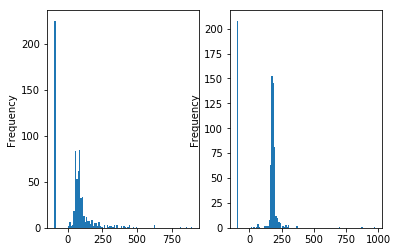

In [41]:
fig = plt.figure()
fig.add_subplot(121)
heroes_df['Weight'].plot('hist',bins=100)
fig.add_subplot(122)
heroes_df['Height'].plot('hist',bins=100)
#The above histograms were run before hard coding weights and heights to follow the distribution of known numbers.
#They showed singular anomalies for the negative numbers at -99.0 so we can be sure we are not messing up the data by
# changing these numbers if we need to later.

In [42]:
#In this incompletely coded box I was considering a way of hard coding the default -99.0 values for height and weight
# to similarly distributed values to the rest of the data.
#heroes2_df = heroes_df
#heroes2_df['Weight'] = heroes_df['Weight'].replace(-99.0, )

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [84]:
#Which columns do they share?
print(heroes_df.columns)
print(powers_df.columns.tolist())

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Alignment', 'Weight'],
      dtype='object')
['name', 'Agility', 'Accelerated Healing', 'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense', 'Underwater breathing', 'Marksmanship', 'Weapons Master', 'Power Augmentation', 'Animal Attributes', 'Longevity', 'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy', 'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing', 'Density Control', 'Stamina', 'Astral Travel', 'Audio Control', 'Dexterity', 'Omnitrix', 'Super Speed', 'Possession', 'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis', 'Darkforce Manipulation', 'Death Touch', 'Teleportation', 'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Hyperkinesis', 'Jump', 'Clairvoyance', 'Dimensional Travel', 'Power Sense', 'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Camouf

In [56]:
#They share the columns with names, however the name columns are titled differently. 
#Here I shall change 'hero_names' to be equal to 'name' so that they match.

powers_df.rename(columns={'hero_names':'name'},inplace=True)
print(heroes_df.info())
print(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 9 columns):
name          719 non-null object
Gender        719 non-null object
Eye color     719 non-null object
Race          719 non-null object
Hair color    719 non-null object
Height        719 non-null float64
Publisher     719 non-null object
Alignment     719 non-null object
Weight        719 non-null float64
dtypes: float64(2), object(7)
memory usage: 76.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, name to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


In [90]:
#The dataframes share names of superheroes so that shall be the index we use.
#It is reasonable not to care about the powers of a superhero if they do not have their main info recorded in heroes_df.
#For this reason we shall perform a left join attaching all data from powers_df onto heroes_df where the names in powers_df 
# have a match in heroes_df.

df = heroes_df.set_index('name').join(powers_df.set_index('name'),how='inner')
print(df.head())
df.shape

            Gender Eye color               Race Hair color  Height  \
name                                                                 
A-Bomb       Male   yellow    Human              No Hair    203.0    
Abe Sapien   Male   blue      Icthyo Sapien      No Hair    191.0    
Abin Sur     Male   blue      Ungaran            No Hair    185.0    
Abomination  Male   green     Human / Radiation  No Hair    203.0    
Abraxas      Male   blue      Cosmic Entity      Black     -99.0     

                     Publisher Alignment  Weight  Agility  \
name                                                        
A-Bomb       Marvel Comics      good      441.0   False     
Abe Sapien   Dark Horse Comics  good      65.0    True      
Abin Sur     DC Comics          good      90.0    False     
Abomination  Marvel Comics      bad       441.0   False     
Abraxas      Marvel Comics      bad      -99.0    False     

             Accelerated Healing  Lantern Power Ring  Dimensional Awareness  \
na

(647, 175)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

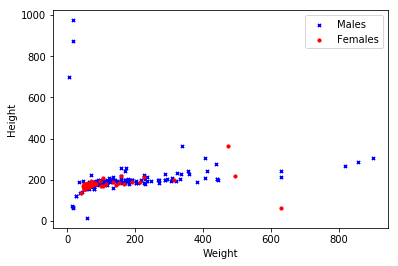

In [107]:
m_df = df.loc[(df['Gender']=='Male') & (df['Weight']>=0) & (df['Height']>=0)]
f_df = df.loc[(df['Gender']=='Female') & (df['Weight']>=0) & (df['Height']>=0)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(m_df['Weight'], m_df['Height'], s=10, c='b', marker="x", label='Males')
ax1.scatter(f_df['Weight'], f_df['Height'], s=10, c='r', marker="o", label='Females')
plt.legend(loc='upper right');
ax1.set_ylabel("Height")
ax1.set_xlabel("Weight")
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [ ]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    pass

In [ ]:
# Male Height


In [ ]:
# Male Weight


In [ ]:
# Female Height


In [ ]:
# Female Weight


Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data